### scikit-learning中的多项式回归和Pipeline

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [5]:
x = np.random.uniform(-3,3,size=100)

In [6]:
X = x.reshape(-1,1)

In [7]:
y = 0.5 * x**2 + x + np.random.normal(0,1,100)

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=2)

In [11]:
poly.fit(X)

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [12]:
X2 = poly.transform(X)

In [13]:
X2[:5,:]

array([[ 1.        ,  1.97611326,  3.90502362],
       [ 1.        ,  0.49775264,  0.24775769],
       [ 1.        ,  2.70173878,  7.29939243],
       [ 1.        ,  1.25102911,  1.56507384],
       [ 1.        , -0.20022579,  0.04009037]])

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_predict2 = lin_reg2.predict(X2)

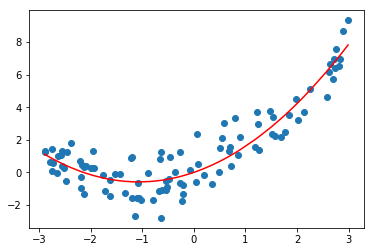

In [18]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color = 'r')


In [19]:
lin_reg2.coef_

array([0.        , 1.09114916, 0.5111157 ])

### 关于PolynomialFeature

In [20]:
X = np.arange(1,11).reshape(-1,2)

In [21]:
X.shape

(5, 2)

In [22]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [23]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [24]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

### pipeline

In [25]:
x = np.random.uniform(-3,3,size=100)
X = x.reshape(-1,1)
y = 0.5 * x**2 + x + np.random.normal(0,1,100)

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler",StandardScaler()),
    ("lin_reg",LinearRegression())
])

In [32]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

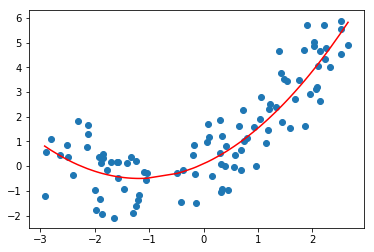

In [33]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color = 'r')
